<a href="https://colab.research.google.com/github/Lewy2609/Indian-Crop-Production-Prediction/blob/main/CPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns ## Visualization
import numpy as np ## Linear Algebra
import pandas as pd ## To work with data
import plotly.express as px ## Visualization
import plotly.graph_objects as go ## Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly as py ## Visuaization
from plotly import tools ## Visualization
import os

In [ ]:
df=pd.read_csv("/content/crop_production.csv")

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Data Cleaning

In [ ]:
df.shape

(242361, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


We have 4 categorical attributes, namely State_Name, District_Name, Season, Crop. The other 3 attributes are numericals values with Area in hectare and Production in tonnes.

In [ ]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
df.Production.isnull().sum()/df.shape[0]

0.0

The Production attribute has 3730 missing values which contributes to just 1.51% of the entire dataset. Hence, we can drop these samples.

In [ ]:
df.dropna(subset=["Production"],axis=0,inplace=True)
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# Checking for any correlation between the numerical attributes.

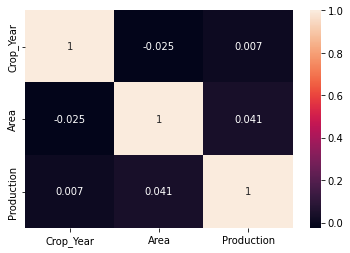

In [ ]:
plt.tick_params(labelsize=10)
sns.heatmap(df.corr(),annot=True);

There is no considerable correlation between any of the attributes in the dataset.

# Individual Attribute Analysis

## State_Name

In [ ]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [ ]:
df.State_Name.nunique()

33

In [ ]:
df.State_Name.value_counts().head(10)

Uttar Pradesh     33189
Madhya Pradesh    22604
Karnataka         21079
Bihar             18874
Assam             14622
Odisha            13524
Tamil Nadu        13266
Maharashtra       12496
Rajasthan         12066
Chhattisgarh      10368
Name: State_Name, dtype: int64

This dataset encodes agriculture data for 33 Indian states (including Union Territories). As seen above, we have more data from states like Uttar Pradesh, Madhya Pradesh and Karnataka than the other states.

## District_Name

In [ ]:
df.District_Name.unique()

In [ ]:
df.District_Name.nunique()

646

In [ ]:
df.District_Name.value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

On District front, we have 646 districts with more data coming from Tumkur, Belgaum, Bijapur, Hassan and Bellary, from Karantaka.

## Crop_Year

In [ ]:
df.Crop_Year.nunique()

19

In [ ]:
print(df.Crop_Year.min())
print(df.Crop_Year.max())

1997
2015


The dataset contains agricultural information for 19 years from the year 1997 to 2015.

In [ ]:
df.Crop_Year.value_counts()

2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64

With most of the data records coming from the years 2002-2011.

## Season

In [ ]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [ ]:
df.Season.nunique()

6

In [ ]:
df.Season.value_counts()

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

Dataset talks about 6 different season crops with more data points including Kharif, Rabi and Annual Crops.

## Crop

In [ ]:
df.Crop.unique()

In [ ]:
df.Crop.nunique()

124

In [ ]:
df.Crop.value_counts()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

The dataset shows data for 124 different crop varieties. We can see that the top crops are Rice,Maize and Moong(Green Gram).

## Area

In [ ]:
df.Area.describe()

count    2.423610e+05
mean     1.216741e+04
std      5.085744e+04
min      1.000000e-01
25%      8.700000e+01
50%      6.030000e+02
75%      4.545000e+03
max      8.580100e+06
Name: Area, dtype: float64

In [ ]:
df.Area.value_counts().head(10)

1.0      3573
2.0      3140
100.0    2621
3.0      2478
4.0      2182
5.0      2090
6.0      1750
200.0    1671
10.0     1590
7.0      1555
Name: Area, dtype: int64

Area under cultivation ranges from 0.1 hectare to 8580100 hectare, with an average area being 12167.41 hectare. A lot of the farmers having a cultivation land area of 1 to 10 hectare.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78f297a290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78f297ad10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78f296fc50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78f297f810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78f297fd50>],
 'means': []}

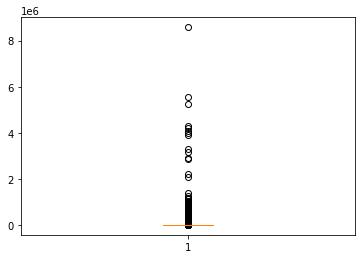

In [ ]:
plt.boxplot(df.Area)

Looking at the distribution we can say that the attribute is highly skewed with quite a few outliers.

## Production

In [ ]:
df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

Production values range from 0 to 1250800000 tonnes, with an average production being 582503.4 tonnes.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f78f28ec090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78f28ecb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78f2966ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78f28f3610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78f28f3b50>],
 'means': []}

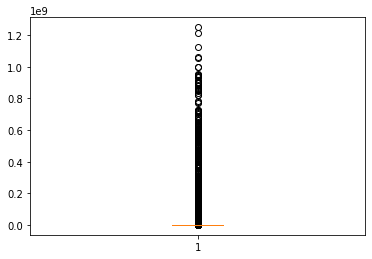

In [ ]:
plt.boxplot(df.Production)

Looking at the distribution we can say that the attribute is highly skewed with quite a few outliers.

# EDA

## Overall Crop Production by State

In [ ]:
temp = df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'State_Name', 'Production')

From above graph we can see that : 

*   Kerala is the highest crops producing state overall. It has produced more than 500% crop than the runner up state, Andhra Pradesh.
*   Top 3 crop producing states are from south India, which put together leave no space to compare rest states.

## Productivity by State

In [ ]:
temp = df.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production']/temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')
px.bar(temp, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area', )

Above graph tells us that :

*   Kerala is the most productive state when we compare in terms of production by area.
*   We see Andaman and Nicobar islands, Puducherry, Goa and many other states which are low in overall production, have higher productivity when we compare with the crop areas.

## Overall Production through the years

In [ ]:
temp = df.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp, 'Crop_Year', 'Production')

## Average Crop Area through the years

In [ ]:
temp = df.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.scatter(temp, 'Crop_Year', 'Area', color='Area', size='Area')

In Above Graph we can see that :

*   Average Crop Area has decresed over the years.
*   We had the lowest Average Crop area in Years 2002 and 2003. (We have comparitively very less data of the year 2015 so, we will not consider that)

## Most and least crop producing Districts

In [ ]:
fig = py.subplots.make_subplots(rows=1,cols=2,
                    subplot_titles=('Highest crop producing districts', 'Least overall crop producing districts'))

temp = df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
temp1 = temp.tail()
trace1 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

temp1=temp.head()
trace2 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.show()

## Most Produced Crops

In [ ]:
top_crop_pro = df.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

In [ ]:
temp = df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp.tail(), 'Crop', 'Production')

## EDA on Coconut

In [ ]:
coc_df = df[df["Crop"]=="Coconut "]
print(coc_df.Season.unique())
print(coc_df.Season.value_counts())

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Season",y="Production",data=coc_df)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="State_Name",y="Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent of production"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Crop_Year",y="Production",data=coc_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.jointplot(x="Area",y="Production",data=coc_df,kind="reg")

Insights from Coconut EDA:

*   Cocunut production is directly proportional to area.
*   Its production is also gradually increasing over a time of period.
*   Production is highest in Kerala.
*   It does not depends on the season.

## EDA on Sugarcane

In [ ]:
sug_df = df[df["Crop"]=="Sugarcane"]
print(sug_df.Season.unique())
print(sug_df.Season.value_counts())

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Season",y="Production",data=sug_df)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="State_Name",y="Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent of production"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Crop_Year",y="Production",data=sug_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.jointplot(x="Area",y="Production",data=sug_df,kind="reg")

Insights from Sugarcane EDA:

*   Sugarecane production is directly proportional to area
*   It is produced in considerably high quantities in many states.

## EDA on Rice

In [ ]:
rice_df = df[df["Crop"]=="Rice"]
print(rice_df.Season.unique())
print(rice_df.Season.value_counts())

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Season",y="Production",data=rice_df)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="State_Name",y="Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent of production"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Crop_Year",y="Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.jointplot(x="Area",y="Production",data=rice_df,kind="reg")

Insights:

*   Rice is produced throughout the year.
*   Production is directly proportional to Area.
*   India consistently producses a high quantity of Rice every year since 1997 ( since we have less data on 2015, there's a reduciton)
*   The higest Rice producing state is Punjab.



# Linear Regression Model

In [ ]:
data1 = df.drop(["District_Name","Crop_Year"],axis=1)

In [ ]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

In [ ]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

In [ ]:
x_train[:5]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
preds = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r2_score(y_test,preds)

0.14641046241956368

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,preds)

0.6956992545201393